In [1]:
import pandas as pd

df = pd.read_csv('heart.csv')
df = pd.DataFrame(df)
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [3]:
df.corr().head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trtbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239


<AxesSubplot:>

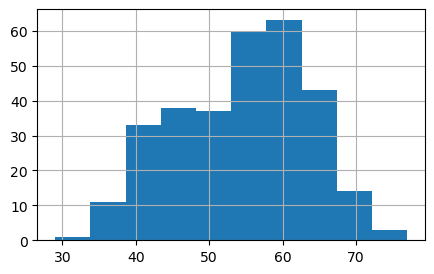

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize = (5,3))
df['age'].hist()

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


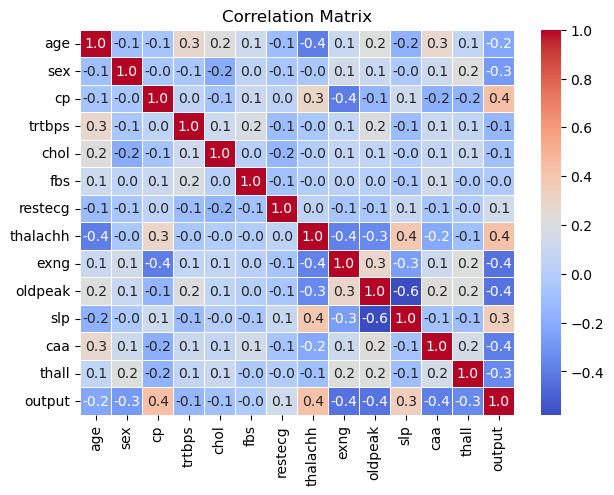

In [5]:
import seaborn as sns

correlation_matrix = df.corr()

plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [6]:
X = df.drop(columns = ['output'])
y = df['output']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [7]:
X_train, X_test, y_train, y_test = X_train.sort_index(), X_test.sort_index(), y_train.sort_index(), y_test.sort_index()
X_train

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(13,)),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1, activation='sigmoid') 
])



optimizer = Adam(learning_rate = 0.01)
model.compile(optimizer= optimizer, loss='binary_crossentropy')
history = model.fit(X_train_scaled, y_train, epochs= 100, batch_size = 32, validation_split = 0.2)

loss, acc = model.evaluate(X_test_scaled, y_test)



Epoch 1/100

7/7 [==============================] - 2s 61ms/step - loss: 0.6174 - val_loss: 0.8412
Epoch 2/100
7/7 [==============================] - 0s 17ms/step - loss: 0.4686 - val_loss: 0.7982
Epoch 3/100
7/7 [==============================] - 0s 13ms/step - loss: 0.3893 - val_loss: 0.8118
Epoch 4/100
7/7 [==============================] - 0s 12ms/step - loss: 0.3417 - val_loss: 0.8325
Epoch 5/100
7/7 [==============================] - 0s 12ms/step - loss: 0.3093 - val_loss: 0.8422
Epoch 6/100
7/7 [==============================] - 0s 12ms/step - loss: 0.2903 - val_loss: 0.8571
Epoch 7/100
7/7 [==============================] - 0s 16ms/step - loss: 0.2820 - val_loss: 0.8680
Epoch 8/100
7/7 [==============================] - 0s 19ms/step - loss: 0.2749 - val_loss: 0.8827
Epoch 9/100
7/7 [==============================] - 0s 21ms/step - loss: 0.2714 - val_loss: 0.8869
Epoch 10/100
7/7 [==============================] - 0s 14ms/step - loss: 0.2686 - val_loss: 0.8916
Epoch 11/100
7/7

7/7 [==============================] - 0s 11ms/step - loss: 0.2639 - val_loss: 0.9755
Epoch 77/100
7/7 [==============================] - 0s 10ms/step - loss: 0.2638 - val_loss: 0.9712
Epoch 78/100
7/7 [==============================] - 0s 10ms/step - loss: 0.2633 - val_loss: 0.9706
Epoch 79/100
7/7 [==============================] - 0s 11ms/step - loss: 0.2629 - val_loss: 0.9594
Epoch 80/100
7/7 [==============================] - 0s 11ms/step - loss: 0.2631 - val_loss: 0.9171
Epoch 81/100
7/7 [==============================] - 0s 11ms/step - loss: 0.2639 - val_loss: 0.8996
Epoch 82/100
7/7 [==============================] - 0s 11ms/step - loss: 0.2644 - val_loss: 0.8980
Epoch 83/100
7/7 [==============================] - 0s 11ms/step - loss: 0.2641 - val_loss: 0.9159
Epoch 84/100
7/7 [==============================] - 0s 11ms/step - loss: 0.2628 - val_loss: 0.9066
Epoch 85/100
7/7 [==============================] - 0s 12ms/step - loss: 0.2647 - val_loss: 0.8934
Epoch 86/100
7/7 [=====

TypeError: cannot unpack non-iterable float object

In [ ]:
import numpy as np
y_pre = model.predict(X_test_scaled)
y_pre_binary = (y_pre> 0.5).astype(int)
y_pre_binary = y_pre_binary.flatten()

In [ ]:
print(y_pre_binary)
print(y_test.values)

In [ ]:
plt.figure(figsize = (6,3))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
n_cols = 3  
n_rows = (len(X_test.columns) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

feature_counter = 0
for i in range(n_rows):
    for j in range(n_cols):
        if feature_counter >= len(X_test.columns):
            continue  # No more features, fill remaining axes with white space
            # axes[i, j].axis('off')

        col = X_test.columns[feature_counter]
        axes[i, j].scatter(X_test[col], y_test, color='blue', label='Actual')
        axes[i, j].scatter(X_test[col], y_pre_binary, color='red', label='Predicted')
        axes[i, j].set_title(f'Best Fit Line for {col}')
        axes[i, j].set_xlabel(col)
        axes[i, j].set_ylabel('Output')
        axes[i, j].legend()
        feature_counter += 1

# Adjust spacing and show the plot
plt.tight_layout()
plt.show()

In [ ]:
X_train.columns[0]